In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
CSV_PATH = Path("../data/raw/comments_train.csv")
MODEL_PATH = Path("../models/sentiment_pipe.joblib")

# Fichier CSV

In [8]:
df = pd.read_csv(CSV_PATH)
df.head(5)

,comment,sentiment
0,J'ai réservé ma table quelques mois à l'avance...,Positive
1,Que dire... Nicolas sale est un chef d excepti...,Positive
2,Dans une rue tranquille non loin du Panthéon u...,Positive
3,Rien à redire le restaurant est irréprochablem...,Positive
4,Comme avec les autres commentaires nos repas é...,Positive


In [9]:
sw =set(stopwords.words('french'))
print(len(sw))

157


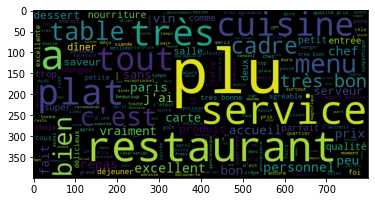

In [10]:
wc = WordCloud(width=800, height=400, stopwords=sw)
wc.generate(" ".join(df.comment.apply(lambda x: x.lower())))
plt.imshow(wc)



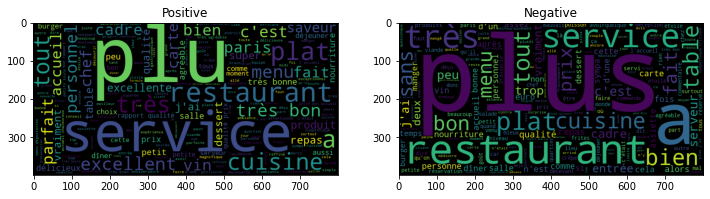

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

for i, col in enumerate(df.sentiment.unique()):
    wc = WordCloud(width=800, height=400, stopwords=sw)
    mask = df.sentiment == col
    wc.generate(" ".join(df[mask].comment.apply(lambda x: x.lower())))
    axs[i].imshow(wc)
    axs[i].set_title(f"{col}")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    1617 non-null   object
 1   sentiment  1617 non-null   object
dtypes: object(2)
memory usage: 25.4+ KB


In [6]:
df.sentiment.unique()

array(['Positive', 'Negative'], dtype=object)

In [11]:
np.round(df.sentiment.value_counts(normalize=True) * 100)

Positive    63.0
Negative    37.0
Name: sentiment, dtype: float64

## Modèle joblib

In [5]:
clf_pipe = load(MODEL_PATH)
print(clf_pipe)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma=0.001))])


C:\Users\User\anaconda3\envs\sandbox\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\User\anaconda3\envs\sandbox\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\User\anaconda3\envs\sandbox\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator SVC from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\User\anaconda3\envs\sandbox\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.2 when using version 0.24.1. This might lead to

In [12]:
X_sample = df.sample(frac=0.1) #Shuffles data
X_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 1577 to 1329
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    162 non-null    object
 1   sentiment  162 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [17]:
x = X_sample.comment
y = X_sample.sentiment.apply(lambda w: 0 if w=="Negative" else 1)

In [19]:
y_pred = clf_pipe.predict(x)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

<AxesSubplot:>

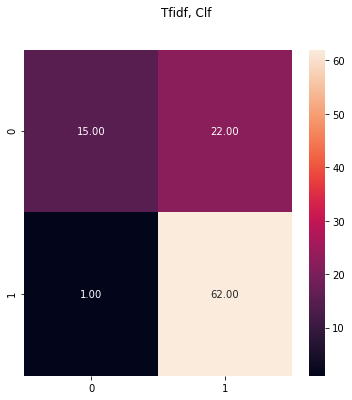

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle(f"{', '.join([name.title() for name, _ in clf_pipe.steps])}")

cm = confusion_matrix(y, y_pred)
sns.heatmap(np.round(100* cm / cm.sum()), annot=True, ax=ax, fmt='.2f')

In [47]:
# Precision and recall
x = df.comment
y = df.sentiment.apply(lambda w: 0 if w=="Negative" else 1)

cvs = cross_val_score(clf_pipe, x, y, cv=10)
print(cvs)
print(cvs.mean())

[0.89506173 0.89506173 0.85802469 0.88888889 0.87654321 0.87037037
 0.86419753 0.90062112 0.86335404 0.89440994]
0.880653324131585


In [25]:
clf_pipe.__class__.__name__

'Pipeline'

In [26]:
dir(clf_pipe)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_inverse_transform',
 '_iter',
 '_log_message',
 '_more_tags',
 '_pairwise',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_transform',
 '_validate_data',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_tr

In [30]:
"_".join([name for name, _ in clf_pipe.steps])

'tfidf_clf'